# Credit Card Users Churn Prediction

##Description


###Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance



###Objective

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank


###Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Import the necessary packages

In [ ]:
!pip install imblearn --user

!pip install imbalanced-learn --user

!pip install xgboost

In [ ]:
# to work with dataframes
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To impute missing values
from sklearn.impute import KNNImputer

# to split data into train and test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# to build logistic regression model
from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
# to use standard scaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier

from xgboost import XGBClassifier



# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
originaldata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Feature Selection_Model Selection and Tuning/Project 5/BankChurners.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
ccardDf = originaldata.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
ccardDf.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
ccardDf.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


### Understand the shape of the dataset.

In [ ]:
ccardDf.shape

(10127, 21)

* Dataset has 10127 rows and 21 columns.

### Check the data types of the columns for the dataset.

In [ ]:
ccardDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
result = ccardDf.select_dtypes(include=np.int64).columns.tolist()
# print(result)
print("These columns {} are of type int64".format(result))

These columns ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct'] are of type int64


In [ ]:
result = ccardDf.select_dtypes(include=np.float64).columns.tolist()
# print(result)
print("These columns {} are of type float64".format(result))

These columns ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] are of type float64


In [ ]:
result = ccardDf.select_dtypes(include=np.object_).columns.tolist()
# print(result)
print("These columns {} are of type object".format(result))

These columns ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] are of type object


## Fixing the data types - Not required, do it in end

In [ ]:
# for c in ccardDf.select_dtypes(include=np.object_).columns:
#     ccardDf[c] = ccardDf[c].astype('category')

In [ ]:
# ccardDf.info()

Changing the columns with object datatype to category has reduced the memory usage by .5 MB.

##Initial Data Analysis and Data Pre-Processing



### Check for missing values and duplicates

In [ ]:
ccardDf.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

`Education_Level` and `Marital_Status` fields have missing values, we should impute them after splitting the data to avoid data leakage. 

In [ ]:
ccardDf.duplicated().any()

False

* There are no missing values or duplicates in the data.

By observing the top  and last 5 records in this dataset CLIENTNUM column looks like a unique identifier for the customer data which may not be significant for our analysis, so we can drop this column.

In [ ]:
# we do not need the ID column here, since it is not related to any of the columns, so this can be dropped
ccardDf.drop("CLIENTNUM", axis=1, inplace=True)

### Statistical summary of Numerical columns

In [ ]:
# summary of numerical attributes
ccardDf.select_dtypes(include= np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


**Observations TODO**
* ***Age*** is quantitative, range of people having bank account is from minimum age of 23 to Maimum age of 67.
* ***Experience*** is quantitative, it has some negative values, we have to do some data preprocessing to correct this data. Minimum experience is 0 which means no experience and maximum experience is 43 years.
* ***Income*** is quantitative, discrete range of values from minimum of 8K dollars to a maximum on 224K dollars, median income is around 64K dollars.
* ***Zipcode*** is qualitative, categorical data. Does not have any significance here, it will be more meanigful if we can determine the region for each zipcode and convert this into a categorical data.
* Customer's ***Family*** is categorical data, having a finite set of values. Size range is from 1 to 4.
* ***CCVAvg*** is quantitative, continuous variable havgin Min average spending on credit cards per month of zero dollars and maximum of 10K dollars.
* ***Education*** is qualitative, categorical data. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* ***Mortgage*** is quantitative, continuous data,Q3 value is 101K dollars and maximum mortgage availed is 635K dollars.
* ***Personal_Loan*** - **target variable**, it is qualitative, binary(0/1), categorical data. If the customer had accepted the personal loan offered in the last campaign then 1 else 0.
* ***Securities_Account*** it is qualitative, binary(0/1), categorical data. If the customer has securities account in AllLife bank then 1 else 0.
* ***CD_Account*** it is qualitative, binary(0/1), categorical data. If the customer has certificate of deposit (CD) account in AllLife bank then 1 else 0.
* ***Online*** it is qualitative, binary(0/1), categorical data. If the customer uses internet banking facility provided by in AllLife bank then 1 else 0.
* ***CreditCard*** it is qualitative, binary(0/1), categorical data. If the customer holds a credit card issued by any other bank other than AllLife bank then 1 else 0.




### Statistical summary of categorical columns

In [ ]:
# summary of numerical attributes
ccardDf.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
# list of all categorical variables
cat_cols = ccardDf.select_dtypes(include = 'object')

# printing the number of occurrences of each unique value in each categorical column
for column in cat_cols:
    print(ccardDf[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


**Observations:**

- `Attrition_Flag` data shows that most of the customers are Existing Customers, very few of them are Attired Customers.

- `Gender` column data shows that there are more Female customers then Male customers.

- Different type of categories in the `Education Level` column are:
  1. Graduate  
  2. High School 
  3. Uneducated
  4. College
  5. Post-Graduate
  6. Doctorate
> Most of them have Graduate degree.

- `Marital_Status`, there are 3 types of Marital status:
    1. Married
    2. Single
    3. Divorced
> Most of the customers are Married

- `Income_Category` following are the different Income categories:
    1. Less than $40K    
    2. $40K - $60K       
    3. $80K - $120K      
    4. $60K - $80K       
    5. abc               
    6. $120K +           
> Most of them have income of Less than $40K. There is a category called **"abc"**, it, looking at the salary ranges it appears that all the different possible combination of categories are listed. We can replace abc will nan and treat it as a missing value later on.

- Different types of `Card_Category` are:
    1. Blue
    2. Silver
    3. Gold
    4. Platinum
> Most of the customers have Blue card.

### Check the balance of class on Target variable

Since our goal is to build a classification model to predict if the customer is going to churn or not, we will replace the Attrition_Flag value of 'Existing Customer' with 0 and value of 'Attrited Customer' with 1.

In [ ]:
## Replace Attrited and Existing customers to 1 and 0 respectively, for analysis.
ccardDf["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)
ccardDf["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)

In [ ]:
# Checking the distribution of target variable
display(ccardDf['Attrition_Flag'].value_counts(), ccardDf['Attrition_Flag'].value_counts(normalize = True)*100)

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

0    83.934038
1    16.065962
Name: Attrition_Flag, dtype: float64

~84% of customers have not Attrited, while ~16% of them have Attrited.
- This indicates that the data is imbalanced between both the classes.

## Feature Engineering

## Outliers Treatment

### Lets check the percentage of Outliers with IQR

In [ ]:
outlier_num = ccardDf.select_dtypes(include=np.number)

# find the 25th percentile and 75th percentile.
Q1 = ccardDf.quantile(0.25)            
Q3 = ccardDf.quantile(0.75)

# Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1                           

# find lower and upper bounds for all values. All values outside these bounds are outliers
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((outlier_num<lower)|(outlier_num>upper)).sum()/len(ccardDf)*100

Attrition_Flag              16.065962
Customer_Age                 0.019749
Dependent_count              0.000000
Months_on_book               3.811593
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       3.268490
Contacts_Count_12_mon        6.211119
Credit_Limit                 9.716599
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              9.509233
Total_Amt_Chng_Q4_Q1         3.910339
Total_Trans_Amt              8.847635
Total_Trans_Ct               0.019749
Total_Ct_Chng_Q4_Q1          3.890590
Avg_Utilization_Ratio        0.000000
dtype: float64

**Observations TODO:**

1. MonthlyIncome and NumberOfFollowups have high outliers.
2. DurationOfPitch and NumberOfTrips also have few outliers.
3. ProductTaken is the target variable, it is not valid here for outlier treatment.
4. Since we are building DecisionTree Based models and they are not influenced by Outliers, we can choose either choose to treat or not to treat.

* In this case I have decided not to treat them as there will be outliers in real case scenario where we deal with huge set of data the values in the fields age, the total amount of transactions and number of transactions will be more balanced and the model should be able to learn the pattern for different customers

### Missing Value Treatment

Replace the value 'abc' in Income_Category column with Nan and do a missing value treatment.

In [ ]:
ccardDf["Income_Category"].replace("abc", np.nan, inplace=True)

#### Heatmap of Missing Data

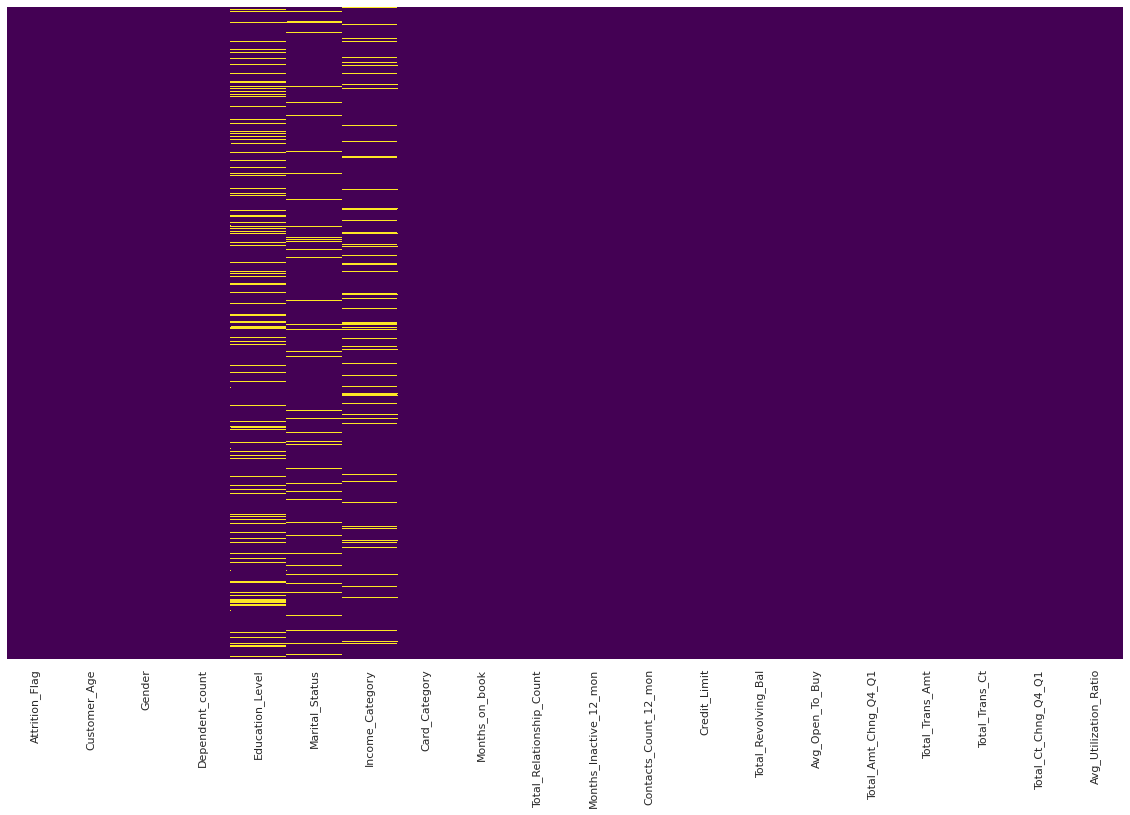

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(ccardDf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

- The above heatmap of missing data shows that the data is missing at random in some of the columns.
- Let us consider imputing the missing values using median for continuous variables and most frequent value for categorical variables.

In [ ]:
# round((tourismDf.isnull().sum()*100)/len(tourismDf),2).sort_values()
ccardDf.isnull().sum().sort_values()

Attrition_Flag                 0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Contacts_Count_12_mon          0
Months_Inactive_12_mon         0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Dependent_count                0
Gender                         0
Customer_Age                   0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Marital_Status               749
Income_Category             1112
Education_Level             1519
dtype: int64

* `PreferredPropertyStar` has 26 missing values
* `NumberOfFollowups` has 45 missing values
* `NumberOfChildrenVisiting` has 66 missing values
* `NumberOfTrips` has 140 missing values
* `MonthlyIncome` has 233 missing values
* `DurationOfPitch` has 251 missing values
* `Age` has 468 missing values

Let us start with the column that has least number of missing values

#### Using KNN Imputer for missing value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

In [ ]:
ccardDf.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category"
]

In [ ]:
ccardDf[reqd_col_for_impute].head()

,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,NaN,Less than $40K
4,Uneducated,Married,$60K - $80K


In [ ]:
ccardDf.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Education_Level = {"Uneducated": 0, "High School": 1, "College": 2,"Graduate": 3,"Post-Graduate": 4,"Doctorate": 5}
ccardDf["Education_Level"] = ccardDf["Education_Level"].map(Education_Level)


In [ ]:
ccardDf.Marital_Status.unique()

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [ ]:
Marital_Status = {"Single":0,"Married":1,"Divorced":2}
ccardDf["Marital_Status"] = ccardDf["Marital_Status"].map(Marital_Status)


In [ ]:
ccardDf.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [ ]:
Income_Category = {"Less than $40K":0, "$40K - $60K":1, "$60K - $80K":2, "$80K - $120K":3,"$120K +":4}
ccardDf["Income_Category"] = ccardDf["Income_Category"].map(Income_Category)

In [ ]:
ccardDf.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,1.0,1.0,2.0,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,3.0,0.0,0.0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,3.0,1.0,3.0,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,1.0,NaN,0.0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,0.0,1.0,2.0,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


* Values have been encoded.

### Data Preparation for Modeling

In [ ]:
X = ccardDf.drop(["Attrition_Flag"], axis=1)
y = ccardDf["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


**Imputing Missing Values**

# Rectification:
- I suggest putting the `imputer` cell here, placing it earlier makes confusion in the learners.
- Transform the **validation** data
`X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])`

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Income_Category, "Income_Category")

* Checking inverse mapped values/categories.

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2030
High School      1460
College          1138
Uneducated        881
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3129
Single      2516
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2250
$40K - $60K       1459
$80K - $120K       979
$60K - $80K        938
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         675
High School      472
College          373
Uneducated       306
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1056
Single       814
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    775
$40K - $60K       507
$60K - $80K       307
$80K - $120K      301
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         700
High School      463
College          362
Uneducated       300
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     1010
Single       854
Divorced     162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    730
$40K - $60K       531
$60K - $80K       323
$80K - $120K      300
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


* Inverse mapping returned original labels.

### Creating Dummy Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* After encoding there are 56 columns.

# Model evaluation criterion TODO

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

### Which case is more important? 
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

### Functions for Model Performance Results 

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Building the model before sampling

**Let's start by building different models using KFold and cross_val_score**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random_Forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("DecissionTree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic_Regression", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 44.97174254317112
Bagging: 78.37885923600209
Random forest: 75.91889063317635
GBM: 82.16954474097331
Adaboost: 81.96284667713239
Xgboost: 81.0413396127682
dtree: 79.20041862899006

Validation Performance:

Logistic regression: 0.5184049079754601
Bagging: 0.8006134969325154
Random forest: 0.8067484662576687
GBM: 0.8650306748466258
Adaboost: 0.8650306748466258
Xgboost: 0.8619631901840491
dtree: 0.8067484662576687


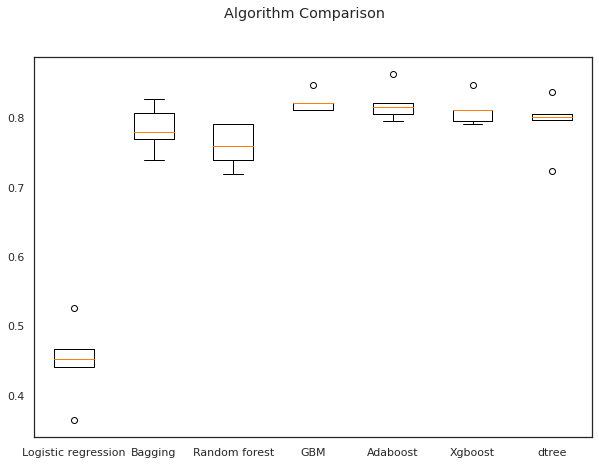

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- GradientBoost is having the highest cross validation recall, AdaBoost performance falls next follwed by XGBoost.
- The boxplot shows that the performance of Adaboost and xgboost are consistent with 1 outlier each.
- DecissionTree and Bagging also show a fairly good performance.
- In this case we can consider GradientBoost, XGBoost and AdaBoost as top 3 performers.

# Oversampling and Undersampling the train data

## Oversampling train data using SMOTE

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 29)
After OverSampling, the shape of train_y: (10198,) 



## Undersampling train data using Random Under Sampler

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



# Building the model with Oversampled data

**Let's start by building different models using KFold and cross_val_score**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models_oversampled = []  # Empty list to store all the models

# Appending models into the list
models_oversampled.append(("Bagging_Over", BaggingClassifier(random_state=1)))
models_oversampled.append(("Random_Forest_Over", RandomForestClassifier(random_state=1)))
models_oversampled.append(("GBM_Over", GradientBoostingClassifier(random_state=1)))
models_oversampled.append(("Adaboost_Over", AdaBoostClassifier(random_state=1)))
models_oversampled.append(("Xgboost_Over", XGBClassifier(random_state=1, eval_metric="logloss")))
models_oversampled.append(("DecissionTree_Over", DecisionTreeClassifier(random_state=1)))
models_oversampled.append(("Logistic_Regression_Over", LogisticRegression(random_state=1)))

results_over = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_oversampled:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models_oversampled:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic_Regression_Over: 81.38848159479689
Bagging_Over: 96.47010717927996
Random_Forest_Over: 98.03885008370375
GBM_Over: 97.05826550443533
Adaboost_Over: 96.27383632550173
Xgboost_Over: 97.23471685043006
DecissionTree_Over: 95.25411302892108

Validation Performance:

Logistic_Regression_Over: 0.7607361963190185
Bagging_Over: 0.8588957055214724
Random_Forest_Over: 0.852760736196319
GBM_Over: 0.8957055214723927
Adaboost_Over: 0.8895705521472392
Xgboost_Over: 0.9049079754601227
DecissionTree_Over: 0.8282208588957055


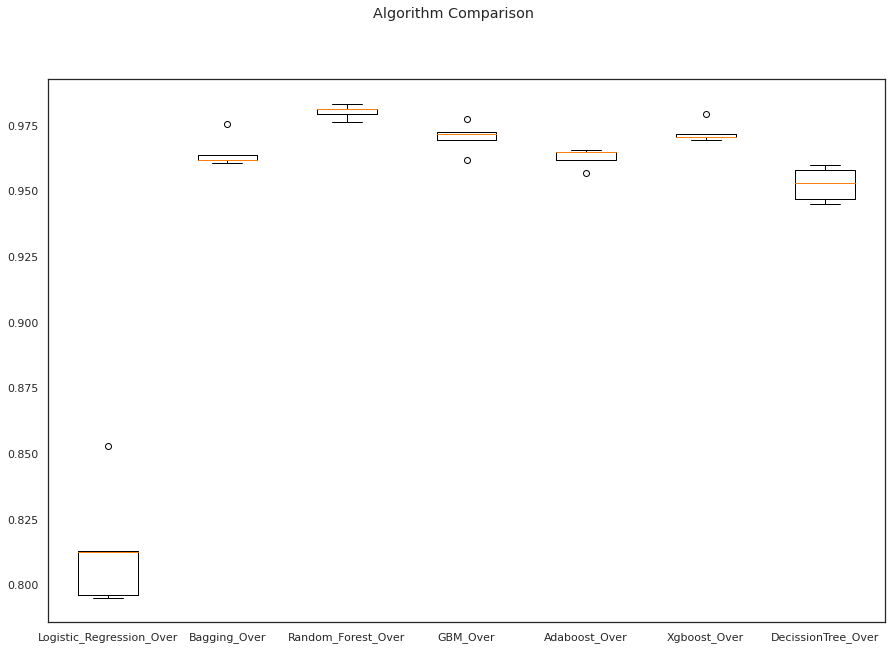

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 10))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names)

plt.show()

- XGBoost is having the highest cross validation recall, GradientBoost performance falls next follwed by Adaboost.
- The boxplot shows that the performance of Adaboost and xgboost are consistent with 1 outlier each. GradientBoost has 2 outliers.
- RandomForest is having the highest cross validation recall, however the model seems to be overfitting since the difference between train and validation seem to be higher compared to other models.
- In this case we can consider XGBoost,GradientBoost and AdaBoost as top 3 performers.

# Building the model with Undersampled data

**Let's start by building different models using KFold and cross_val_score**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [ ]:
models_undersampled = []  # Empty list to store all the models

# Appending models into the list
models_undersampled.append(("Bagging_Under", BaggingClassifier(random_state=1)))
models_undersampled.append(("Random_Forest_Under", RandomForestClassifier(random_state=1)))
models_undersampled.append(("GBM_Under", GradientBoostingClassifier(random_state=1)))
models_undersampled.append(("Adaboost_Under", AdaBoostClassifier(random_state=1)))
models_undersampled.append(("Xgboost_Under", XGBClassifier(random_state=1, eval_metric="logloss")))
models_undersampled.append(("DecissionTree_Under", DecisionTreeClassifier(random_state=1)))
models_undersampled.append(("Logistic_Regression_Under", LogisticRegression(random_state=1)))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_undersampled:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models_undersampled:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging_Under: 91.1883830455259
Random_Forest_Under: 93.5468341182627
GBM_Under: 94.05860805860806
Adaboost_Under: 92.42019884877027
Xgboost_Under: 94.05808477237049
DecissionTree_Under: 88.93511250654107
Logistic_Regression_Under: 81.3526949241235

Validation Performance:

Bagging_Under: 0.9141104294478528
Random_Forest_Under: 0.941717791411043
GBM_Under: 0.9601226993865031
Adaboost_Under: 0.9570552147239264
Xgboost_Under: 0.9570552147239264
DecissionTree_Under: 0.9079754601226994
Logistic_Regression_Under: 0.8282208588957055


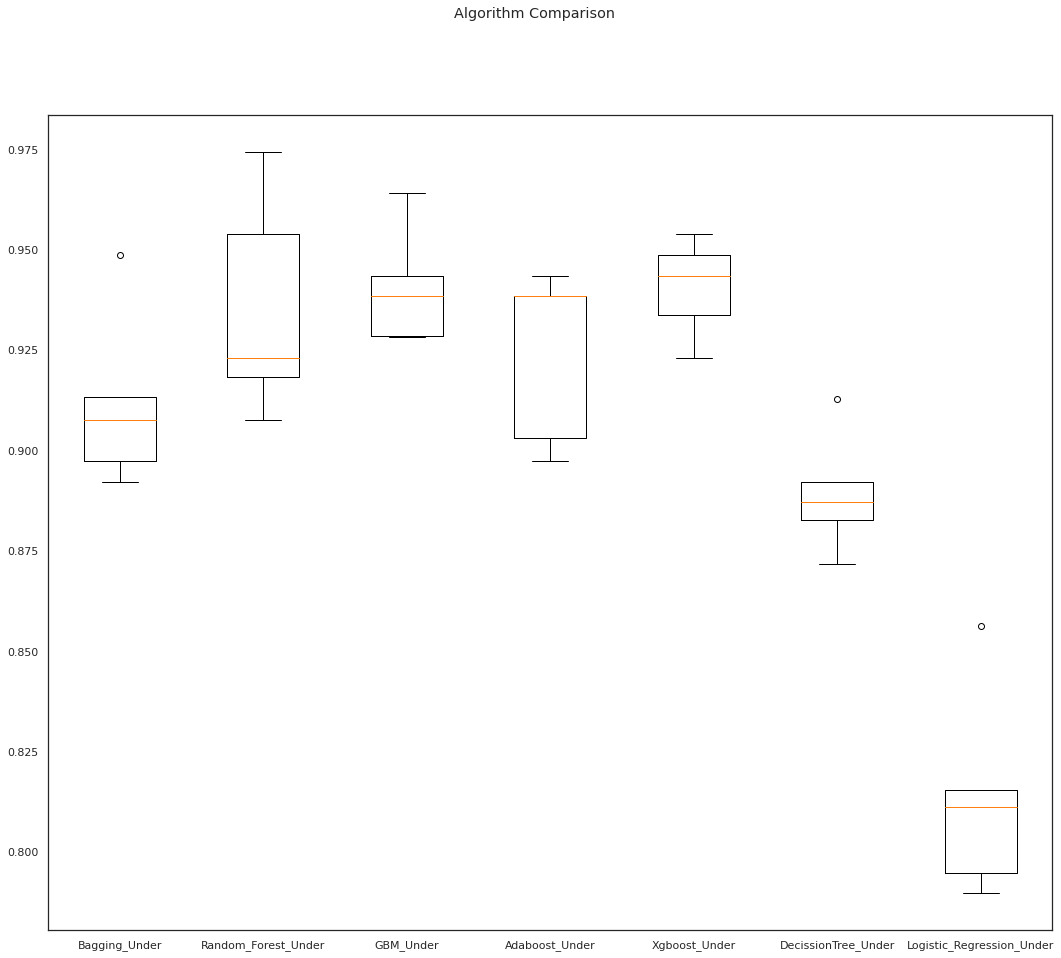

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(18, 15))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- GradientBoost is having the highest cross validation recall, XGBoost performance falls next follwed by AdaBoost.
- RandomForest and Bagging also show a fairly good performance.
- In this case we can consider GradientBoost, XGBoost and AdaBoost as top 3 performers.

# Hyperparameter tuning on original data using RandomizedSearchCV

## Tuning Adaboost

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8647409733124019:
Wall time: 49.4 s


<IPython.core.display.Javascript object>

In [ ]:
Ada_Tunned = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
Ada_Tunned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
Ada_Train = model_performance_classification_sklearn(Ada_Tunned, X_train, y_train)
Ada_Train

,Accuracy,Recall,Precision,F1
0,0.994897,0.979508,0.988625,0.984045


In [ ]:
# Checking model's performance on validation set
Ada_Val = model_performance_classification_sklearn(Ada_Tunned, X_val, y_val)
Ada_Val

,Accuracy,Recall,Precision,F1
0,0.96693,0.883436,0.908517,0.895801


- AdaBoost model is also overfitting in terms of recall

## Tuning Xgboost

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.05, 'gamma': 5} with CV score=0.9630926216640502:
CPU times: user 3.88 s, sys: 271 ms, total: 4.15 s
Wall time: 1min 15s


In [ ]:
Xgb_Tunned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.05,
    gamma=5,
)
Xgb_Tunned.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', gamma=5, learning_rate=0.05,
              n_estimators=200, random_state=1, scale_pos_weight=10,
              subsample=0.9)

In [ ]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(Xgb_Tunned, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.941399,0.990779,0.735921,0.844541


In [ ]:
# Checking model's performance on validation set
xgb_val = model_performance_classification_sklearn(Xgb_Tunned, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.936821,0.978528,0.725,0.832898


- Model is giving us a generalized performance

## Tuning Gradient boosting classifier

In [ ]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8596180010465725:
Wall time: 51.5 s


<IPython.core.display.Javascript object>

In [ ]:
GB_Tunned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
GB_Tunned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
GB_Train = model_performance_classification_sklearn(GB_Tunned, X_train, y_train)
GB_Train

,Accuracy,Recall,Precision,F1
0,0.989465,0.951844,0.98203,0.966701


In [ ]:
# Checking model's performance on validation set
GB_Val = model_performance_classification_sklearn(GB_Tunned, X_val, y_val)
GB_Val

,Accuracy,Recall,Precision,F1
0,0.974827,0.892638,0.947883,0.919431


- GradientBoost model is slightly overfitting in terms of recall score

# Hyperparameter tuning on oversampled data using RandomizedSearchCV

## Tuning Adaboost

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9521559006330698:
CPU times: user 6.49 s, sys: 326 ms, total: 6.82 s
Wall time: 2min 30s


In [ ]:
Ada_Tunned_Over = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
Ada_Tunned_Over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
Ada_Train_Over = model_performance_classification_sklearn(Ada_Tunned_Over, X_train_over, y_train_over)
Ada_Train_Over

,Accuracy,Recall,Precision,F1
0,0.982055,0.987449,0.976911,0.982152


In [ ]:
# Checking model's performance on validation set
Ada_Val_Over = model_performance_classification_sklearn(Ada_Tunned_Over, X_val, y_val)
Ada_Val_Over

,Accuracy,Recall,Precision,F1
0,0.959526,0.898773,0.856725,0.877246


- AdaBoost Model is overfitting in terms of recall

## Tuning Xgboost

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 5} with CV score=0.9972549019607844:
CPU times: user 3.57 s, sys: 301 ms, total: 3.87 s
Wall time: 2min 23s


In [ ]:
Xgb_Tunned_Over = XGBClassifier(
    random_state=1,    
    eval_metric="logloss",
    subsample=1,
    scale_pos_weight=10,
    n_estimators=50,
    learning_rate=0.05,
    gamma=5,
)
Xgb_Tunned_Over.fit(X_train_over, y_train_over)

XGBClassifier(eval_metric='logloss', gamma=5, learning_rate=0.05,
              n_estimators=50, random_state=1, scale_pos_weight=10)

In [ ]:
# Checking model's performance on training set
xgb_train_over = model_performance_classification_sklearn(Xgb_Tunned_Over, X_train_over, y_train_over)
xgb_train_over

,Accuracy,Recall,Precision,F1
0,0.822612,0.999412,0.738337,0.849263


In [ ]:
# Checking model's performance on validation set
xgb_val_over = model_performance_classification_sklearn(Xgb_Tunned, X_val, y_val)
xgb_val_over

,Accuracy,Recall,Precision,F1
0,0.821816,0.966258,0.473684,0.635721


- XGBoost Model is giving a generalized performance

## Tuning Gradient boosting classifier

In [ ]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9460776616829264:
CPU times: user 6.23 s, sys: 268 ms, total: 6.5 s
Wall time: 2min 25s


In [ ]:
GB_Tunned_Over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
GB_Tunned_Over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
GB_Train_Over = model_performance_classification_sklearn(GB_Tunned_Over, X_train_over, y_train_over)
GB_Train_Over

,Accuracy,Recall,Precision,F1
0,0.990292,0.990783,0.989812,0.990297


In [ ]:
# Checking model's performance on validation set
GB_Val_Over = model_performance_classification_sklearn(GB_Tunned_Over, X_val, y_val)
GB_Val_Over

,Accuracy,Recall,Precision,F1
0,0.965943,0.90184,0.888218,0.894977


- Gradient boosting model is also overfitting a little in terms of recall

# Hyperparameter tuning on undersampled data using RandomizedSearchCV

## Tuning Adaboost

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.947760334903192:
CPU times: user 2.63 s, sys: 82 ms, total: 2.71 s
Wall time: 38.3 s


In [ ]:
Ada_Tunned_Under = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
Ada_Tunned_Under.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
Ada_Train_Under = model_performance_classification_sklearn(Ada_Tunned_Under, X_train_un, y_train_un)
Ada_Train_Under

,Accuracy,Recall,Precision,F1
0,0.998975,1.0,0.997955,0.998976


In [ ]:
# Checking model's performance on validation set
Ada_Val_Under = model_performance_classification_sklearn(Ada_Tunned_Under, X_val, y_val)
Ada_Val_Under

,Accuracy,Recall,Precision,F1
0,0.942744,0.966258,0.75,0.844504


- AdaBoost Model is overfitting in terms of recall

## Tuning Xgboost

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9908110936682366:
CPU times: user 2.28 s, sys: 70.4 ms, total: 2.35 s
Wall time: 32.9 s


In [ ]:
Xgb_Tunned_Under = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
Xgb_Tunned_Under.fit(X_train_un, y_train_un)

XGBClassifier(eval_metric='logloss', gamma=1, learning_rate=0.01,
              n_estimators=200, random_state=1, scale_pos_weight=10,
              subsample=0.9)

In [ ]:
# Checking model's performance on training set
xgb_train_under = model_performance_classification_sklearn(Xgb_Tunned_Under, X_train, y_train)
xgb_train_under

,Accuracy,Recall,Precision,F1
0,0.691193,0.998975,0.342105,0.509671


In [ ]:
# Checking model's performance on validation set
xgb_val_under = model_performance_classification_sklearn(Xgb_Tunned_Under, X_val, y_val)
xgb_val_under

,Accuracy,Recall,Precision,F1
0,0.709279,0.996933,0.355969,0.524617


- XGBoost Model is giving a generalized performance

## Tuning Gradient boosting classifier

In [ ]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8596180010465725:
Wall time: 51.5 s


<IPython.core.display.Javascript object>

In [ ]:
GB_Tunned_Under = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
GB_Tunned_Under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
GB_Train_Under = model_performance_classification_sklearn(GB_Tunned_Under, X_train_un, y_train_un)
GB_Train_Under

,Accuracy,Recall,Precision,F1
0,0.996926,0.998975,0.994898,0.996933


In [ ]:
# Checking model's performance on validation set
GB_Val_Under = model_performance_classification_sklearn(GB_Tunned_Under, X_val, y_val)
GB_Val_Under

,Accuracy,Recall,Precision,F1
0,0.948667,0.966258,0.772059,0.858311


- Gradient boosting model is giving a generalized performance.

# Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Ada_Train.T,
        Ada_Val.T,
        Ada_Train_Over.T,
        Ada_Val_Over.T,
        Ada_Train_Under.T,
        Ada_Val_Under.T,
        GB_Train.T,
        GB_Val.T,
        GB_Train_Over.T,
        GB_Val_Over.T,
        GB_Train_Under.T,
        GB_Val_Under.T,
        xgb_train.T,
        xgb_val.T,
        xgb_train_over.T,
        xgb_val_over.T,
        xgb_train_under.T,
        xgb_val_under.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained original",
    "AdaBoost Validation original",
    "AdaBoost trained on oversample",
    "AdaBoost validation on oversample",
    "AdaBoost trained on undersample",
    "AdaBoost validation on undersample",
    "GradientBoost trained original",
    "GradientBoost validation original",
    "GradientBoost trained on oversample",
    "GradientBoost validation on oversample",
    "GradientBoost trained on undersample",
    "GradientBoost validation on undersample",
    "XGBoost trained original",
    "XGBoost validation original",
    "XGBoost trained on oversample",
    "XGBoost validation on oversample",
    "XGBoost trained on undersample",
    "XGBoost validation on undersample",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
AdaBoost trained original,0.994897,0.979508,0.988625,0.984045
AdaBoost Validation original,0.966930,0.883436,0.908517,0.895801
AdaBoost trained on oversample,0.982055,0.987449,0.976911,0.982152
AdaBoost validation on oversample,0.959526,0.898773,0.856725,0.877246
AdaBoost trained on undersample,0.998975,1.000000,0.997955,0.998976
AdaBoost validation on undersample,0.942744,0.966258,0.750000,0.844504
GradientBoost trained original,0.989465,0.951844,0.982030,0.966701
GradientBoost validation original,0.948667,0.966258,0.772059,0.858311
GradientBoost trained on oversample,0.990292,0.990783,0.989812,0.990297
GradientBoost validation on oversample,0.965943,0.901840,0.888218,0.894977


- Adaboost with undersampled data is performing the best but overfit for Precision and F1 score
- Gradient boosting with undersampled data is also performing good but it is also overfit for precision and f1 score
- Xgboost trained using original data has the best generalised performance
- Not considering xgboost as many people won't be able to built it
- Adaboost trained with undersampled data is performing best

#### Performance on the test set

In [ ]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(Xgb_Tunned, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.939289,0.981538,0.731651,0.838371


- The performance on test data is generalised

In [ ]:
Xgb_Tunned.feature_importances_

array([0.02504618, 0.01120334, 0.03804043, 0.07929643, 0.05573431,
       0.03027412, 0.01795852, 0.13173416, 0.03059281, 0.0452313 ,
       0.07816052, 0.2745714 , 0.04961402, 0.03869916, 0.03428226,
       0.        , 0.        , 0.        , 0.00696553, 0.        ,
       0.01778795, 0.        , 0.        , 0.00845865, 0.        ,
       0.        , 0.        , 0.02634893, 0.        ], dtype=float32)

IndexError: ignored

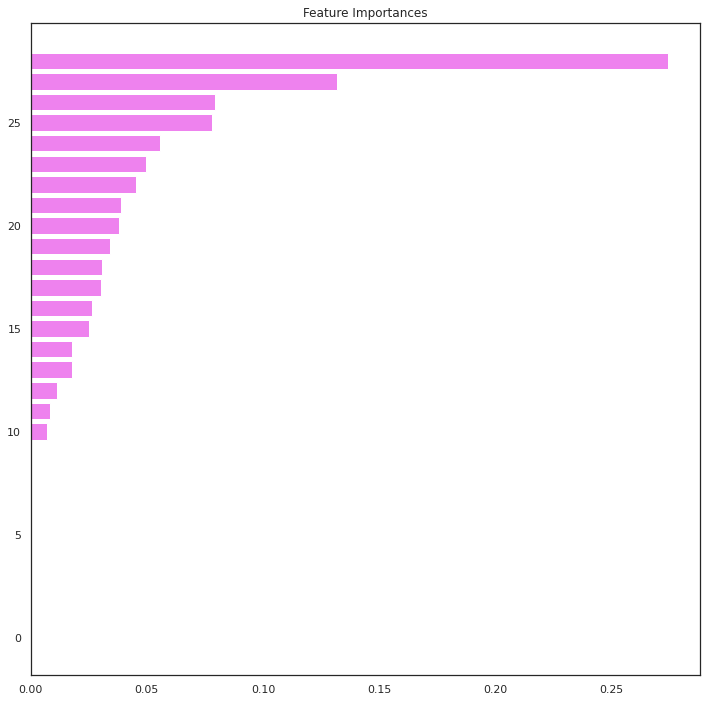

In [ ]:
feature_names = X.columns
importances = Xgb_Tunned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Amount spent on gold products is the most important feature, followed by Teenhome and NumCatalogPurchases.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [ ]:
# creating a list of numerical variables
numerical_features = [
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Complain",
    "Age",
    "Reg_year",
    "Reg_month",
    "Reg_week",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Education", "Marital_Status"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [ ]:
# Separating target variable and other variables
X = data1.drop(columns="Response")
Y = data1["Response"]

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(1565, 22) (671, 22)


<IPython.core.display.Javascript object>

In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                   

<IPython.core.display.Javascript object>

In [ ]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,

<IPython.core.display.Javascript object>